In [ ]:
#Summary

#1 Intro to MNIST

#2 Import Python modules and get the data 
#2.1 Import Python modules
#2.2 Get the data
#2.2.1 Take a quick glance at the data

#3 Create training & test sets 
#3.1 Shuffle the training set.

#4 Select and Train a Model

#4.1 Training a binary Classifier (a five selector)
#4.1.1 Performance Measures
#4.1.1.1 Measuring accuracy using cross-validation
#4.1.1.2 Confusion Matrix
#4.1.1.3 Precision and Recall
#4.1.1.4 Precision/Recall Tradeoff
#4.1.1.5 The ROC curve

#4.2 Multiclass Classification
#4.2.1 Error Analysis

#4.3 Multilabel Classification

#4.4 Multioutput Classification


In [ ]:
##1 Intro to MNIST

#This dataset is comprises a set of 70K small images of digits written by highschool students and employees of the US Census
#Bureau. Each image is labeled with the digit it represents. 

#This dataset is already splitted into a training (first 60K images) and test (last 10K images) sets. 

In [ ]:
#2 Import Python modules and get the data 

In [9]:
#2.1 Import Python modules

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
#2.2 Get the data

import scipy.io
import os
from os import listdir

mnist = scipy.io.loadmat('mnist-original.mat')

mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [ ]:
#2.2.1 Take a quick glance at the data

In [12]:
X, y = mnist["data"].transpose(), mnist["label"].transpose().ravel()
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
#Each image has 784 features (28x28 pixels). Each feature represents' one pixel's intensity, from 0 (white) to 255 (black).

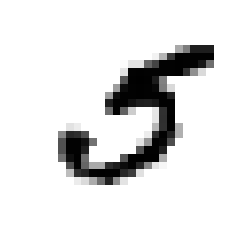

In [10]:
#visualize a digit

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28) #The image was flattened.

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [13]:
y[36000]

5.0

In [15]:
##3 Create training & test sets 

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
#3.1 Shuffle the training set. 

#This will guarantee that all cross-validation folds will be similar (every fold should have all digits).

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
#4 Select and Train a Model

In [18]:
#4.1 Training a binary Classifier (a five selector)

#create target vectors:

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


#Select classifier

from sklearn.linear_model import SGDClassifier #handles very large dataset efficiently

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
#Verify prediction

sgd_clf.predict([some_digit])

array([ True])

In [21]:
#4.1.1 Performance Measures

In [22]:
#4.1.1.1 Measuring accuracy using cross-validation 

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to 

array([0.86392721, 0.88699435, 0.86582987])

In [24]:
#4.1.1.2 Confusion Matrix

#Accuracy is generally not a the prefered performance measure for classifiers, especially when the dataset is skewed
#(some classes are more frequent than others). 

#A much better way is to use the confusion matrix.The general idea is to count the number of times istances of class A are
#classified as class B:

                            #Predicted
    
                      #Negative     #Positive
        
#Actual  Negative        TN             FP

#Actual Positive         FN             TP

#A perfect classifier would have only TP and TN.

#To compute the confusion matrix, you first need a set of predictions, so they can be compared to the actual targets.

from sklearn.model_selection import cross_val_predict #returns predictions instead of scores.

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to 

array([[53501,  1078],
       [ 1547,  3874]], dtype=int64)

In [25]:
#The above matrix indicates we have 53501 TN, 1078 FP, 1547 FN and 3874 TP.

In [26]:
#4.1.1.3 Precision and Recall

#Although the confusion matrix gives a lot of information, more concise metrics are preferred:

#Precision = TP / (TP + FP) measures the accuracy of positive predictions.

#Recall, sensitivity, or true positive rate = TP / (TP + FN) measures the ratio of positive instances that are correctly 
                                                            #detected by the classifier.
    
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)


(0.7823101777059773, 0.7146282973621103)

In [27]:
#The above results indicate that the "five-detector" is correct only 78% of the time and it only detects 71% of the fives.

In [28]:
#It is often convinient to combine precision and recall into a single metric called the F1 score. This is the harmonic mean 
#of precision and recall, giving much more weight to low values. As a result, the classifier will only get high F1 if both
#precision and recall are high.

#F1 = TP / [TP + (FN+FP)/2]

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7469391689964331

C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to 

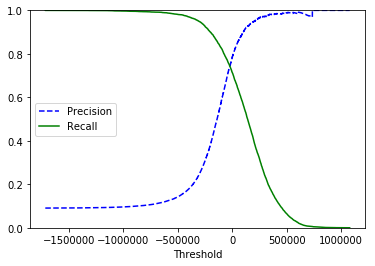

In [36]:
#4.1.1.4 Precision/Recall Tradeoff

#Generally, increasing precision reduces recall, and viceversa. This is called precision/recall tradeoff. In some contexts,
#you mostly care about precision and in other contexts you may care about recall. See Fig. 3-3 on pag 90.

#For each instance, the SGDClassifier computes a score based on a decision function, and if that score is greater than a 
#threshold, it assigns the instance to the positive class or else. Lowering the threshold increases recall and reduces precision.

#To decide which threshold to use you will first need to get the scores of all instances in the training set using the 
#cross_val_predict() function, but specifying you want it to return decision scores instead of predictions:

from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

#Now with these scores you can compute precision and recall for all possible thresholds using:

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#Finally, you can plot precision and recall as functions of the threshold value using Matplotlib and select the threshold 
#value that gives you the best precision/recall for your task.

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [37]:
#Let's suppose you aim for 90% precision. Looking at the plot, you find you need to use a threshold of about 150000. Hence:

threshold = 150000
y_train_pred_90 = (y_scores > threshold)
precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90)

(0.9292786421499293, 0.484781405644715)

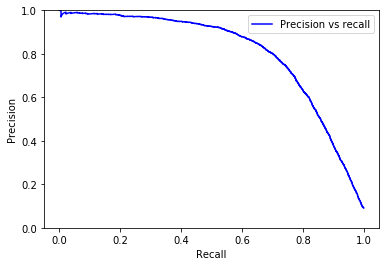

In [38]:
#Another way to select a good precision/recall tradeoff is to plot precision directly against recall

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b-", label="Precision vs recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="best")
    plt.ylim([0, 1])

plot_precision_vs_recall(precisions, recalls, )
plt.show()

In [ ]:
#Main takehome message: If someone says "let's reach 99% precision", you should ask at what recall.

In [39]:
#4.1.1.5 The ROC curve

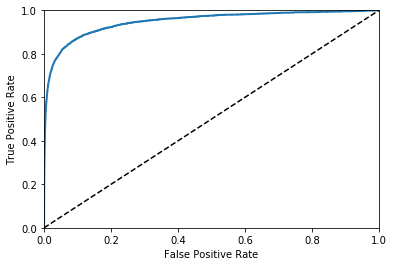

In [40]:
#The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It plots the 
#True Positive Rate (recall) against the False Positive Rate (1-specificity), where:

#specificity (True Negative Rate) = TN / (TN + FP)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label='None'):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1],[0, 1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [41]:
#The dotted-line above represents the ROC curve of a purely random classifier. A good classifier stays as far away as possible 
#from that line (towards the top-left corner). One way to compare classifers is to measure the area under the curve (AUC). 
#A perfect Classifier will have a ROC AUC equal to 1, whereas a purely random one will have a ROC AUC equal to 0.5.

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9487650128682512

In [42]:
#As a rule of thumb, you should prefer the precission/recall (PR) curve whenever the positive class is rare or when you care 
#more about the false positives than the false negatives, and the ROC curve otherwise. For example, from the ROC curve 
#(and its AUC) you could think that the classifier is really good. But this is because there are few positives (5s) compared to
#the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement 
#(the curve could be closer to the top-right corner).

C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


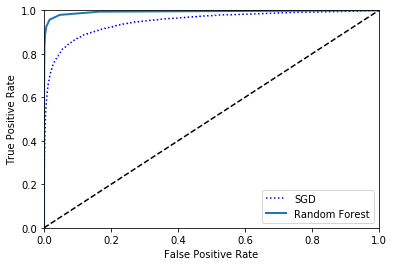

In [43]:
#Let's train a RandomForestClassifier to compare its ROC and ROC AUC scores to the SGDClassifier. The former has a predict_proba
#method, which returns an array containing a row per instance and a column per class, each containing the probability that the
#given instance belongs to the given class:

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

#But to plot a ROC curve you need scores, no probabilities. A simple solution is to use the positive class's probability as the
#score:

y_scores_forest = y_probas_forest[:,1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [44]:
#The RandomForestClassifier's ROC curve is much closer to the top-left corner. As a result, its ROC AUC is also better:

roc_auc_score(y_train_5, y_scores_forest)

0.9934868927896131

In [47]:
#4.2 Multiclass Classification

#Some algortithms such as RandomForestClasffiers and Naive bayes classifiers are capable of handling multiple classes directly.
#In the case of linear classifiers or SVM classifiers other strategies must be omplemented to used them for multiclass classif.
#such as OvO or OvA (see pag 96).

#To train a Random Forest Classifier:
forest_clf.fit(X_train, y_train)

forest_clf.predict([some_digit])

C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5.])

In [48]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0.1, 0. , 0. ]])

In [ ]:
#The method predicts that the image is a 5 with 90% of probability. 

In [ ]:
#4.2.1 Error Analysis

In [50]:
#Using cross-validation.

cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.94146171, 0.93814691, 0.94279142])

In [54]:
#using confussion matrix

y_train_forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

conf_mx = confusion_matrix(y_train, y_train_forest_pred)

conf_mx

array([[5794,    2,   15,   11,   10,   22,   23,    3,   39,    4],
       [   2, 6632,   36,   19,   12,   10,    4,   13,    9,    5],
       [  52,   29, 5641,   49,   44,   16,   27,   45,   45,   10],
       [  23,   20,  141, 5622,    8,  120,   12,   50,   99,   36],
       [  21,   25,   30,   11, 5542,    7,   31,   24,   24,  127],
       [  52,   19,   38,  182,   22, 4948,   60,   15,   55,   30],
       [  43,   16,   28,    8,   31,   67, 5700,    1,   24,    0],
       [  11,   39,   90,   24,   69,   10,    0, 5907,   19,   96],
       [  28,   50,   90,  114,   63,  100,   41,   21, 5269,   75],
       [  37,   13,   34,   77,  185,   53,    6,  102,   49, 5393]],
      dtype=int64)

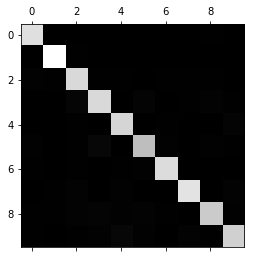

In [55]:
#It's often more convenient to look at an image representation of the confusion matrix

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

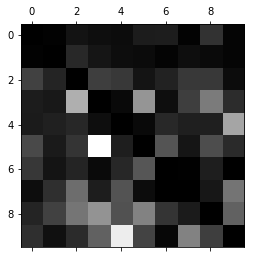

In [56]:
#The confussion matrix looks fairly good, since most images are on the main diagonal, which means that they were classified 
#correctly. The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset
#or that the classifier does not perform as well on 5s as on other digits.

#To focus on the plot errors, you need to divide each value in the confusion matrix by the number of images in the corresponding
#class, so you can compare error rates instead of absolute number of errors. 

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0) #Fill the diagonal with zeros to keep only the errors.

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()


In [57]:
#See pag 100 for interpretation of this kind of color matrix. 

In [58]:
#4.3 Multilabel Classification

In [85]:
#In some cases, you may want your classifier to output multiple classes for each instance. For example, let's create a 
#y_multilabel arraycontaining two-target labels for each digit image: the first indcates whether or not the digit is large
#(7, 8, 9) and the second indcates whether or not its odd. The KNeighborsClassifier supports multilabel classification.

y_train_large = [y_train >= 7]
y_train_odd = (y_train % 2 == 1)
y_train_large = np.asarray(y_train_large).transpose().ravel()
y_train_odd = np.asarray(y_train_odd)

#y_train_odd.shape, y_train_large.shape

y_multilabel = np.c_[y_train_large, y_train_odd] #Translates slice objects to concatenation along the second axis.

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])

array([[False,  True]])

In [86]:
#It gets it right: The digit 5 is not large (False) and odd (True)

In [ ]:
#There are many ways to evaluate a multioutput classifier. For instance, computing the average F1 score across all labels:

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_train_knn_pred, y_multilabel, average="macro") #"macro" assumes that all labels are equally important. If this is not
                                                          #the case, "weighted" should be used.

In [ ]:
#4.4 Multioutput Classification

#It is a generalization of multilabel classification, where each label can be multiclass. For example, let's build a system that
#removes noise from MNIST images. Here the classifier's output is multilabel (one label per pixel) and each label can have
#multiple values (pixel intensity ranges from 0 to 255).

noise = np.random.randint(0, 100, (len(X_train)), 784) #adds noise to X_train
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test)), 784) #adds noise to X_test
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test


In [ ]:
#Let's compare a noisy vs an original image

noisy_digit = X_test_mod[36000]
noisy_digit_image = noisy_digit_image.reshape(28, 28) #The image was flattened.

plt.imshow(noisy_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
#Let's train the classifier to clean the image:

knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[36000]])
plot_digit(clean_digit)